### Data Loading

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")

(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape)

((33, 51), (33, 51), (33, 51), (33, 51))

### Visualization 

**Issue** How to visualise 200 Dimensional data?
- Reduce Dimensions: Use techniques like PCA or t-SNE to reduce dimensions.
- Plot Pairs: Create scatter plots for feature pairs to spot patterns.
- Heatmap: Display correlation matrix as a heatmap.
- Parallel Coordinates: Plot multiple features on parallel axes.
- Box Plots: Show feature distributions using box plots.
- Histograms: Display frequency distribution of individual features.
- Violin Plots: Combine box plots and kernel density plots.
- Feature Importance: Use bar plots to show feature importance.
- Interactive Tools: Utilize tools like Plotly for dynamic visualizations.


In [24]:
# Defining my features 



arr2 = pd.concat([data_ad , data_fa , data_md , data_rd])
X = arr2.values


### K-Means clustering


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

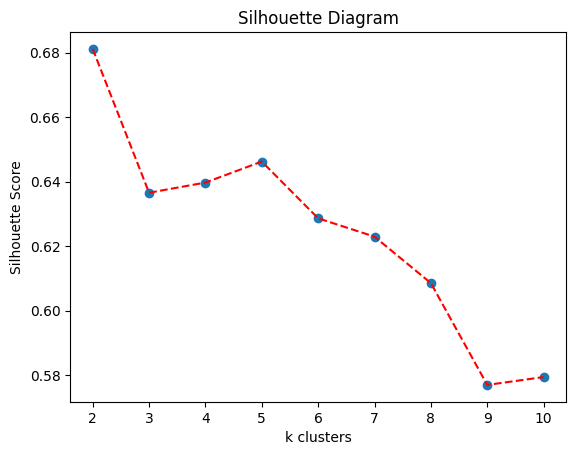

In [25]:
# Selecting the optimum number of clusters 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
lis = []
lis_num = []

for i in range(2,11) :
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(X)
    lis.append(silhouette_score(X, kmeans1.labels_))
    lis_num.append(i)
    
plt.plot(lis_num ,lis , "r--")
plt.scatter(lis_num, lis)
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Diagram")
plt.show()

# Optimum no .of clusters , where silhouete score s maximum  , is 2 , 4 OR 5 .
    

In [26]:
X1 = pd.DataFrame(X )
X

# for training , use dataframs and for visualization , use np arrays 

array([[2.88530e+04, 4.64791e-01, 1.23300e-03, ..., 7.11000e-04,
        5.76015e-01, 4.51000e-04],
       [2.88550e+04, 4.42318e-01, 1.87100e-03, ..., 7.38000e-04,
        4.44814e-01, 5.04000e-04],
       [2.88560e+04, 4.05412e-01, 1.37100e-03, ..., 7.53000e-04,
        6.53998e-01, 4.62000e-04],
       ...,
       [2.89070e+04, 3.97580e-01, 1.08100e-03, ..., 1.12000e-03,
        4.66634e-01, 8.35000e-04],
       [2.89080e+04, 4.52123e-01, 1.08900e-03, ..., 1.71100e-03,
        4.42711e-01, 1.45500e-03],
       [2.89090e+04, 4.04164e-01, 1.13400e-03, ..., 2.10600e-03,
        5.29114e-01, 1.86100e-03]])

In [27]:
# K - Means Clusatering 

from sklearn.cluster import KMeans 



kmeans = KMeans (n_clusters = 5 , n_init = 3)
predict = kmeans.fit_predict(X1)


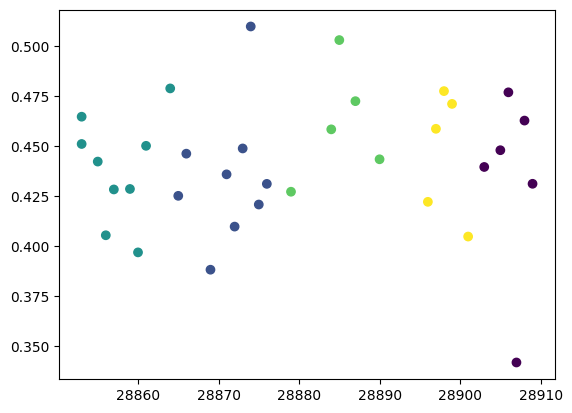

In [28]:
plt.scatter( X[: 34 , 0] , X[:34 , 1] , c = predict[:34] , cmap = "viridis")
plt.show()

In [29]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 

mini_batch = MiniBatchKMeans (n_clusters = 5 , n_init = 3)

mini_batch.fit (X)

MiniBatchKMeans(n_clusters=5, n_init=3)

Heirarchical Clustering - Agglomerative Clustering 

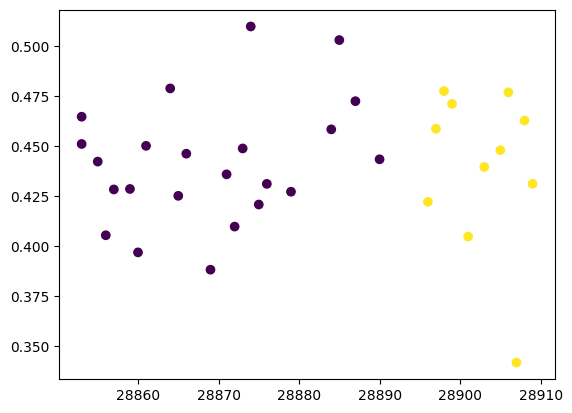

In [30]:
# Heirarchichal Clustering 


# Agglomerative CLustering 

from sklearn.cluster import AgglomerativeClustering 

agg_cluster = AgglomerativeClustering()
 # t
labe = agg_cluster.fit_predict(X1)


# showing the clusters based on first 2 features of fa 

plt.scatter(X[:34 , 0] , X[ :34 , 1] , c= labe[:34] , cmap = "viridis" )
plt.show()


Gaussian Mixture Model ( Trial ) 

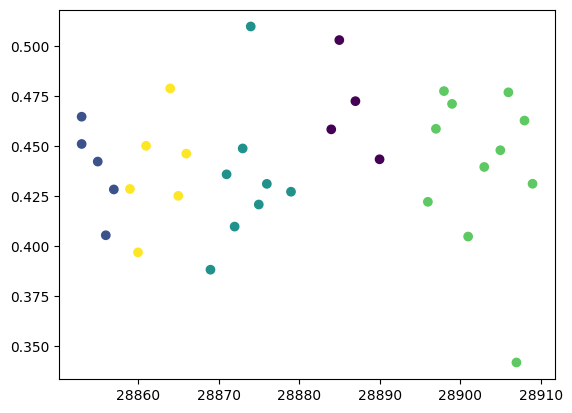

In [45]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture( n_components = 5 , n_init = 10) 
gmm.fit(X)

c1 = gmm.predict(X)

# model params 

# gmm.means_
# gmm.weights_
# gmm.covariances_

plt.scatter( X[: 34 , 0] , X[:34 , 1] , c = c1[:34 , ] , cmap = "viridis")
plt.show()


In [32]:


# To identify Sub-froups (if they exist) after clustering , we can use dendograms node's OR DBSCAN or even Simple Data Visualizations 

